# Tugas Besar: Deteksi Covid-19 pada Gambar CXR

## Motivation

### Problem
Penanganan Covid-19 sampai saat ini masih sangat bergantung pada metode PCR (Polymerase Chain Reaction) untuk mendeteksi adanya virus Sars-Cov-2 pada manusia. Metode PCR ini sudah teruji mampu memberikan hasil yang paling baik dibandingkan dengan metode-metode lainnya. Namun metode ini juga memiliki kelemahan karena prosesnya yang cukup lama, yaitu butuh 3-7 hari hingga hasil tes keluar. Padahal seseorang yang telah terinfeksi Covid-19 sangat berpotensi menularkan virus ini ke orang lain, tenaga medis sangat butuh untuk memberikan keputusan diagnosa dalam waktu cepat. Selain itu telah terbukti adanya false negative pada metode PCR yang terjadi saat PCR digunakan pada tahap awal infeksi. Perilaku dari virus Sars-Cov-2 yang masih baru ini masih menimbulkan banyak tanda tanya. Metode penanganan yang sepenuhnya berfungsi ternyata masih memiliki kelemahan, karena itu dibutuhkan metode-metode lain yang sifatnya komplementer sehingga dapat mengurangi kemunculan false negative sebanyak-banyaknya.

Covid-19 pada dasarnya adalah salah satu jenis Pneumonia. Pneumonia merupakan infeksi yang menyebabkan peradangan pada kantong udara (alveoli) di paru-paru, sehingga kantong udara terisi oleh cairan dan menyebabkan penderitanya mengalami sesak nafas. Pneumonia bisa disebabkan oleh bakteri, jamur, atau virus yang salah satunya adalah virus Sars-Cov-2. Gambar radiologi (x-ray scan dan ct scan) sudah umum digunakan untuk mendeteksi adanya pneumonia dengan mengamati tanda-tanda pada tampakan radiologis yang disebut dengan infiltrasi/opasiti/konsolidasi. Saat ini pemeriksaan radiologi sudah dijadikan standar untuk memeriksa pasien Covid-19, sebagai komplemen dari PCR dan pemeriksaan klinis lainnya. Pemeriksaan dengan radiologi relatif lebih cepat dari PCR, hasil pemeriksaan bisa didapat dalam waktu 1 hari. Namun sama seperti pengetesan lainnya, metode ini juga memiliki false positive. Terlebih lagi, pembacaan gambar radiologi bersifat operator-dependent, yang artinya setiap dokter spesialis radiologi bisa memberikan rekomendasi diagnosa yang berbeda.

### Solution
Deep Learning untuk klasifikasi Pneumonia (Covid-19) pada gambar radiologi dengan mencari tanda kemunculan infiltrat/opasiti/konsolidasi.

![alt text](https://drive.google.com/uc?id=1kQOINj0U8NY1BNqhSWQU9xqtvLSgYTji)



## **DISCLAIMER**

MODEL AI INI TIDAK DITUJUKAN UNTUK MENJADI SOLUSI ATAS PERMASALAHAN COVID-19 YANG SEDANG TERJADI. YANG TERCANTUM DI SINI DAN YANG ANDA KERJAKAN SELURUHNYA BERADA DALAM KONTEKS KEPENTINGAN AKADEMIK UNTUK MEMAHAMI CARA KERJA SISTEM BERBASIS PEMBELAJARAN MESIN.

Pemanfaatan AI di bidang medis membutuhkan studi yang mendalam dan penuh kehati-hatian, pengembangannya melibatkan pakar-pakar di bidang AI, medis, dan lain-lain. Pada praktiknya, penggunaan AI di bidang medis dibatasi hanya sebagai alat bantu pemeriksaan dan pemberi rekomendasi, bukan alat penentu diagnosis. Keputusan terkait diagnosis terhadap pasien sepenuhnya adalah wewenang tenaga medis yang bersangkutan, sesuai dengan hukum yang berlaku.

## Instruksi Tugas Besar
Didalam notebook ini, seluruh script sudah disediakan sehingga Anda tidak perlu lagi mengerjakan bagian script yang kosong. Sebagai gantinya, anda diminta untuk menjalankan program untuk melakukan training model menggunakan **dataset baru** yang diberikan, melakukan evaluasi, dan membandingkan performa model baru dengan performa model awal. Selama pengerjaan Anda akan diberi petunjuk terkait alur dan instruksi pengerjaan. Oleh karena itu, perhatikan istruksi dengan baik.

>**Note:** Setelah Anda menyelesaikan tugas besar ini, Anda diminta untuk mengumpulkan tugas besar ini dalam bentuk HTML. Sebelum diubah menjadi HTML, semua script harus dipastikan sudah di-run agar penilai dapat melihat hasil dari kode yang dijalankan. Anda dapat mengubah notebook ini menjadi HTML dengan **File -> Download as -> HTML(.html)**. Sertakan file HTML tersebut bersama folder tugas besar ini.

Selain mengimplementasikan bagian script yang kosong, Anda juga diminta menjawab pertanyaan analisis. Pertanyaan tersebut ditandai dengan tulisan **'Pertanyaan X'**. Baca dengan baik pertanyaan tersebut dan berikan jawaban anda secara jelas di bagian dengan tulisan **Jawaban**. Tugas besar Anda akan dinilai berdasarkan 
kode implementasi dan juga jawaban analisis setiap pertanyaan.

>**Note:** Sel Code dan Markdown dapat dieksekusi dengan **Shift+Enter** di keyboard. Sel Markdown dapat di-edit dengan mengklik dua kali sel tersebut.

Bagian yang diberi tanda **_opsional_** merupakan tugas yang diberikan jika Anda ingin mendapatkan nilai lebih dari standar minimum.

## Alur Tugas Besar
Notebook tugas besar ini dibagi menjadi beberapa langkah sebagai berikut. Silahkan diperhatikan dan dipahami alur dan detail setiap langkah.
1. Notebook Setting
2. Environment Setting
3. Dataset Preparation
3. Label Separation
4. Label One-Hot-Encoding
5. Model Definition
6. Hyperparameters
7. Optimizer and Loss Function
8. Model Training
9. Model Evaluation
10. Eksperimen Model Machine Learning Lain(Opsional)
11. Implementasi Model

## Kelompok yang mengerjakan
Silahkan klik dua kali sel ini kemudian isi bagian yang kosong.

**Kelompok: 4** 

**Anggota Kelompok:**
1. anggota 1 | NIM 1
2. anggota 2 | NIM 2
3. anggota 3 | NIM 3


## 1. Notebook Setting


Pengaturan notebook ini bertujuan untuk mengatur penggunaan GPU sebagai runtime Notebook. GPU dibutuhkan karena komputasi yang akan kita lakukan cukup besar. Pemrosesan menggunakan CPU akan menghabiskan waktu yang sangat lama.

In [0]:
# Check for listed GPU

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 15652590227025364186
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9964196386607820700
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 3002359034468040191
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 15701463552
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4296977629413992098
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]


In [0]:
# Check for selected GPU

!nvidia-smi

Sun May 17 01:58:13 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   39C    P0    32W / 250W |    353MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [7]:
# Mount google drive to our notebook

from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Check for tensorflow version

import tensorflow as tf
print(tf.__version__)

2.2.0


## 2. Environment Setting

Pengaturan environment menentukan library apa saja yang digunakan. Ingat selalu untuk mengimport library yang dibutuhkan saja.

In [0]:
# import dependencies
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import matplotlib.pyplot as plt
import numpy as np
import argparse
import cv2
import os

## 3. Datasets Preparation

Dataset sample yang diberikan sudah terbagi ke dalam 2 folder normal dan covid, masing-masing folder berisi 25 data gambar. Data ini sangat sedikit, tidak bisa merepresentasi kasus yang sebenarnya. Pada praktiknya, data yang dibutuhkan jumlahnya ribuan hingga puluhan ribu untuk masing-masing kelas.

In [8]:
# initialize path and name for datasets, plot image, and model
dataset = "/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/"
plot_name = "plot.png"
model_name = "covid19.model"

# initialize data(image) and label from dataset directory
print("[INFO] loading images...")
imagePaths = list(paths.list_images(dataset))
data = []
labels = []

[INFO] loading images...


NameError: ignored

In [0]:
print(imagePaths)

['/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/covid/ryct.2020200034.fig2.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/covid/auntminnie-a-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/covid/nejmoa2001191_f4.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-a.jpg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/covid/1-s2.0-S0929664620300449-gr2_lrg-c.jpg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/covid/auntminnie-b-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg', '/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/covid/auntminnie-c-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavi

## 4. Label Separation

Untuk setiap gambar, dibuat label yang sesuai dengan kelasnya. Pemberian label dilakukan dengan membaca parent folder dari setiap gambar. Di akhir proses, semua data diubah bentuknya ke dalam NumPy array. Kemudian data dinormalisasi sehingga nilai pixelnya berada di antara 0 dan 1.

In [0]:
# loop over the image paths, extract data and label, and preprocess image
for imagePath in imagePaths:
	label = imagePath.split(os.path.sep)[-2]
	image = cv2.imread(imagePath)
	image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
	image = cv2.resize(image, (224, 224))
	data.append(image)
	labels.append(label)
 
# convert to NumPy arrays and normalize to the range [0, 1]
data = np.array(data) / 255.0
labels = np.array(labels)


In [0]:
# just a sanity check, as usual

print(len(data))
print(len(labels))
#print(data)
print(labels)

50
50
['covid' 'covid' 'covid' 'covid' 'covid' 'covid' 'covid' 'covid' 'covid'
 'covid' 'covid' 'covid' 'covid' 'covid' 'covid' 'covid' 'covid' 'covid'
 'covid' 'covid' 'covid' 'covid' 'covid' 'covid' 'covid' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal'
 'normal' 'normal' 'normal' 'normal' 'normal' 'normal' 'normal']


## 5. One-hot Encoding and Data Augmentation

Dalam keras, data label perlu diolah menjadi matriks yang tiap baris berupa vektor nilai nol atau satu. Data label tersebut perlu dioleh dengan metode One-Hot-Encoding.

Proses selanjutnya adalah data augmentasi.


**Pertanyaan 1**: Apa itu data augmentasi dan apa pengaruhnya pada performa model? Jelaskan juga mengapa data augmentation pada poin 9 hanya dilakukakn untuk data train?

**Jawaban:** (silahkan klik dua kali cell ini)

salah satu teknik untuk memperbanyak jumlah model data yang akan digunakan tanpa menambah gambar / data baru dengan cara menduplikasi suatu gambar/data yang telah ada kemudian dilakukan pengolahan data/gambar pada data yang telah diduplikasi seperti dilakukan penambahan derau/noise pada gambar, dilakukan rotasi, flipping, zoom dan berbagai proses pengubahan gambar sehingga tercipta gambar baru yang masih dikenali sebagai data yang sama. 

penggunaan teknik augmentasi data akan meningkatkan performa model yang digunakan, karena semakin banyak variasi dataset yang digunakan untuk diproses tanpa harus menambah data baru.

data augmentasi dilakukan hanya pada data train karena hanya pada proses pelatihan/training semakin banyak variasi data yang digunakan maka akan semakin baik performa dalam melakukan pembuatan model data.

In [0]:
# one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)
labels = to_categorical(labels)

# split dataset to train and test data
(trainX, testX, trainY, testY) = train_test_split(data, labels,
	test_size=0.20, stratify=labels, random_state=42)

# initialize data augmentation
trainAug = ImageDataGenerator(
	rotation_range=15,
	fill_mode="nearest")

In [0]:
# better_augmentation
# train_datagen = ImageDataGenerator(
#       rescale=1./255,
#       rotation_range=40,
#       width_shift_range=0.2,
#       height_shift_range=0.2,
#       shear_range=0.2,
#       zoom_range=0.2,
#       horizontal_flip=True,
#       fill_mode='nearest')



In [0]:
# sanity check, again

print(labels)

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]]


## 6. Model Definition

Arsitektur yang digunakan pada tugas ini adalah VGG16 dengan menggunakan pretrained model yang sudah ditraining menggunakan dataset Imagenet. Ini adalah metode yang dinamakan transfer learning, menggunakan pengetahuan yang telah didapat dari model lain untuk memperkuat model yang baru.

Notes for VGG16 arguments

```python
tf.keras.applications.VGG16(
    include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
    pooling=None, classes=1000, classifier_activation='softmax'
)

tf.keras.applications.ResNet152(
    include_top=True, weights='imagenet', input_tensor=None, input_shape=None,
    pooling=None, classes=1000, **kwargs
)
```

In [0]:
# load the VGG16 pretrained model
baseModel = VGG16(weights="imagenet", include_top=False,
	input_tensor=Input(shape=(224, 224, 3)))

# construct the new head of the model
headModel = baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(2, activation="softmax")(headModel)


# place the new head model on top of the base model
model = Model(inputs=baseModel.input, outputs=headModel)

# freeze the base model
for layer in baseModel.layers:
	layer.trainable = False

58892288/58889256 [==============================] - 1s 0us/step


In [0]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# Define a Callback class that stops training once accuracy reaches desired accuracy
# Just in case we need some

desired_accuracy = 0.99

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>desired_accuracy):
      print("\nReached 99.9% accuracy so cancelling training!")
      self.model.stop_training = True

## 7. Hyparameter


Hyperparameters merupakan nilai-nilai yang perlu ditentukan agar kita dapat memeroleh hasil training yang baik. Dalam hal ini, perlu ditentukan nilai learning rate, ukuran batch dan jumlah iterasi epoch. Anda tidak diwajibkan melakukan fine tuning terhadap hyperparameter ini, namun memilih hyperparameter yang lebih baik dapat meningkatkan performa model dengan signifikan.

In [0]:
# initialize learning rate, epochs, and batch size
INIT_LR = 1e-3
EPOCHS = 25
BS = 8

## 8. Optimizer and Loss Function

Optimizer merupakan opsi yang juga perlu diperhatikan, pilihan optimizer dalam Keras dapat dilihat [keras-optimizers](https://keras.io/optimizers/). Selain itu, loss function juga perlu dipilih yang disesuaikan dengan jenis data yang digunakan. Dalam Keras jenis-jenis loss function dapat dilihat di [keras-losses](https://keras.io/losses/).

**Pertanyaan 2**: Optimizer di sini menggunakan ADAM, apa bedanya ADAM dengan GD yang sudah dipelajari di kelas? Apakah ada baiknya kita mengganti optimizer ini dengan optimizer yang lain?

**Jawaban:** (silahkan klik dua kali cell ini)

...

In [0]:
# compile model
print("[INFO] compiling model...")
opt = Adam(lr=INIT_LR, decay=INIT_LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,
	metrics=["accuracy"])

[INFO] compiling model...


## 9. Model Training

Pada tahap ini. kita menggabungkan semua data dan parameter yang telah didefiniska di atas, kemudian melakukan training model.

In [0]:
# train model
print("[INFO] training head...")
H = model.fit_generator(
	trainAug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS)

[INFO] training head...
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/25
5/5 [==============================] - 1s 207ms/step - loss: 0.9693 - accuracy: 0.3250 - val_loss: 0.7140 - val_accuracy: 0.5000
Epoch 2/25
5/5 [==============================] - 0s 90ms/step - loss: 0.8002 - accuracy: 0.4500 - val_loss: 0.7050 - val_accuracy: 0.5000
Epoch 3/25
5/5 [==============================] - 0s 96ms/step - loss: 0.7265 - accuracy: 0.5000 - val_loss: 0.7021 - val_accuracy: 0.5000
Epoch 4/25
5/5 [==============================] - 0s 89ms/step - loss: 0.6776 - accuracy: 0.5250 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 5/25
5/5 [==============================] - 0s 93ms/step - loss: 0.6676 - accuracy: 0.6000 - val_loss: 0.6554 - val_accuracy: 0.6000
Epoch 6/25
5/5 [==============================] - 0s 92ms/step - loss: 0.7187 - accuracy: 0.5250 - val_loss: 0.6385 - val_accuracy: 0.7000
Epoch 7/25
5/5 [==============================] - 0s 93ms/step - 

In [0]:
!nvidia-smi

Sun May 17 02:02:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    33W / 250W |   6691MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## 10. Model Evaluation

Berikut adalah script yang dapat digunakan untuk menguji model dengan dataset test. Dilakukan perhitungan berupa Confusion Matrix, Accuracy, Sensivity, dan Specificity.

**Pertanyaan 3**: Jelaskan penggunaan keempat metric di atas untuk mengukur performa model ini. Apakah keempat metric tersebut sudah representatif? Adakan metode lain yang lebih baik?

**Jawaban**: (silahkan klik dua kali cell ini)

...

In [0]:
# predict data test
print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)
predIdxs = np.argmax(predIdxs, axis=1)
print(classification_report(testY.argmax(axis=1), predIdxs,
	target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

       covid       1.00      0.80      0.89         5
      normal       0.83      1.00      0.91         5

    accuracy                           0.90        10
   macro avg       0.92      0.90      0.90        10
weighted avg       0.92      0.90      0.90        10



In [0]:
# compute the confusion matrix, accuracy, sensitivity, and specificity

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)
total = sum(sum(cm))
acc = (cm[0, 0] + cm[1, 1]) / total
sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

print(cm)
print("acc: {:.4f}".format(acc))
print("sensitivity: {:.4f}".format(sensitivity))
print("specificity: {:.4f}".format(specificity))

[[4 1]
 [0 5]]
acc: 0.9000
sensitivity: 0.8000
specificity: 1.0000


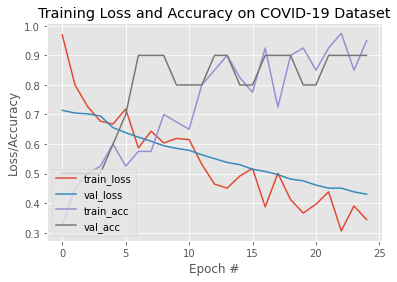

In [0]:
# plot losses and accuracy

N = EPOCHS
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on COVID-19 Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
plt.savefig("plot.png")

In [0]:
# save model to disk
print("[INFO] saving COVID-19 detector model...")
model.save("covid19.model", save_format="h5")

[INFO] saving COVID-19 detector model...


In [0]:
!nvidia-smi

Fri May 15 05:57:14 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.82       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P0    31W / 250W |   6691MiB / 16280MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

## TUGAS BESAR 1

Lakukan ulang metode di atas untuk jumlah data training dan testing yang lebih banyak. Anda diperbolehkan untuk menggunakan data sebanyak-banyaknya (tidak terbatas pada data yang diberikan), mengganti metode augmentasi, melakukan tuning hyperparameter, mengganti arsitektur, menggunakan pretrained model lain, dan menentukan performance metric yang menurut anda baik.

Pada folder tugas besar terdapat tiga folder dataset, berikut penjelasan untuk masing-masing folder.

*   sample_dataset: merupakan hasil sampling dari Dr Cohen's Dataset, berisi 25 data x-ray normal dan 25 data x-ray Covid-19.
*   sansten_dataset: merupakan data hasil sampling dari Dr Cohen's Dataset, berisi 102 data x-ray normal, 102 data x-ray bacterial pneumonia, dan 95 data Covid-19.
*   chestimaging_dataset: merupakan data 51 kasus Covid-19, jumlah gambar setiap kasus beragam.

Tidak semua dataset bersih dan dapat langsung digunakan, pastikan untuk mengecek satu-persatu dataset sebelum melakukan training. Misalnya pada dataset yang diberikan terdapat x-ray yang diambil dari penampang lain, terdapat hasil ct scan, dll. Penggunaan dataset yang tidak teratur dapat menurunkan performa model.



Referensi:

Dataset
*   Dr Cohen's Dataset: https://github.com/ieee8023/covid-chestxray-dataset
*   Audrey's Dataset: https://github.com/agchung/Figure1-COVID-chestxray-dataset
*   Kaggle NIH Dataset: https://www.kaggle.com/nih-chest-xrays/data
*   @ChestImaging's Dataset: https://twitter.com/i/status/1243928581983670272
*   COVIDx Dataset: https://github.com/lindawangg/COVID-Net/blob/master/docs/COVIDx.md

Github
*   COVID-Net: https://github.com/lindawangg/COVID-Net

Tutorial (source code tugas ini)
*   https://www.pyimagesearch.com/2020/03/16/detecting-covid-19-in-x-ray-images-with-keras-tensorflow-and-deep-learning/





## TUGAS BESAR 2 (Opsional)

Class Activation Map (CAM) adalah explanation method untuk melihat perilaku dari suatu model. CAM mengambil fitur hasil ekstraksi dari convolution layer dan memvisualisasikan gradien yang didapat dalam bentuk heatmap. Daerah dengan intensitas heatmap tinggi menunjukkan bahwa pada bagian memiliki confidence level yang tinggi untuk diklasifikasikan ke kelas yang bersangkutan. Jika hasil evaluasi menunjukkan akurasi yang bagus, namun heatmap dari CAM menunjukkan lokasi yang salah, berarti model mempelajari fitur yang salah.

Gunakan Class Activation Map atau explanation method lainnya pada model Covid-19, kemudian analisis perilaku model. 


Referensi:

Paper
*   https://arxiv.org/abs/1610.02391

Github
*   https://github.com/insikk/Grad-CAM-tensorflow

Tutorial
*   https://www.pyimagesearch.com/2020/03/09/grad-cam-visualize-class-activation-maps-with-keras-tensorflow-and-deep-learning/

In [0]:
# Initiating tubes 2 bitch

import cv2



In [2]:
# Install necessary packages
!pip install cmapy
!pip install -U tensorflow_hub

  Created wheel for cmapy: filename=cmapy-0.6.6-cp36-none-any.whl size=3959 sha256=86ee1199eedb260b74cebc80bb39a87b05b6531a7b2d310bcaad36cc37285818
  Stored in directory: /root/.cache/pip/wheels/6d/75/b1/b8645ff93df032bd16a383e7774e03d904476450d767fb1dcf
Successfully built cmapy
Requirement already up-to-date: tensorflow_hub in /usr/local/lib/python3.6/dist-packages (0.8.0)


In [0]:
# Import necessary packages for Grad-CAM and define class GradCAM
from tensorflow.keras.models import Model
import tensorflow as tf
import numpy as np
import cv2
import cmapy

class GradCAM:
	def __init__(self, model, classIdx, layerName=None):
		# store the model, the class index used to measure the class
		# activation map, and the layer to be used when visualizing
		# the class activation map
		self.model = model
		self.classIdx = classIdx
		self.layerName = layerName

		# if the layer name is None, attempt to automatically find
		# the target output layer
		if self.layerName is None:
			self.layerName = self.find_target_layer()

	def find_target_layer(self):
		# attempt to find the final convolutional layer in the network
		# by looping over the layers of the network in reverse order
		for layer in reversed(self.model.layers):
			# check to see if the layer has a 4D output
			if len(layer.output_shape) == 4:
				return layer.name

		# otherwise, we could not find a 4D layer so the GradCAM
		# algorithm cannot be applied
		raise ValueError("Could not find 4D layer. Cannot apply GradCAM.")

	def compute_heatmap(self, image, eps=1e-8):
		# construct our gradient model by supplying (1) the inputs
		# to our pre-trained model, (2) the output of the (presumably)
		# final 4D layer in the network, and (3) the output of the
		# softmax activations from the model
		gradModel = Model(
			inputs=[self.model.inputs],
			outputs=[self.model.get_layer(self.layerName).output, 
				self.model.output])

		# record operations for automatic differentiation
		with tf.GradientTape() as tape:
			# cast the image tensor to a float-32 data type, pass the
			# image through the gradient model, and grab the loss
			# associated with the specific class index
			inputs = tf.cast(image, tf.float32)
			(convOutputs, predictions) = gradModel(inputs)
			loss = predictions[:, self.classIdx]

		# use automatic differentiation to compute the gradients
		grads = tape.gradient(loss, convOutputs)

		# compute the guided gradients
		castConvOutputs = tf.cast(convOutputs > 0, "float32")
		castGrads = tf.cast(grads > 0, "float32")
		guidedGrads = castConvOutputs * castGrads * grads

		# the convolution and guided gradients have a batch dimension
		# (which we don't need) so let's grab the volume itself and
		# discard the batch
		convOutputs = convOutputs[0]
		guidedGrads = guidedGrads[0]

		# compute the average of the gradient values, and using them
		# as weights, compute the ponderation of the filters with
		# respect to the weights
		weights = tf.reduce_mean(guidedGrads, axis=(0, 1))
		cam = tf.reduce_sum(tf.multiply(weights, convOutputs), axis=-1)

		# grab the spatial dimensions of the input image and resize
		# the output class activation map to match the input image
		# dimensions
		(w, h) = (image.shape[2], image.shape[1])
		heatmap = cv2.resize(cam.numpy(), (w, h))

		# normalize the heatmap such that all values lie in the range
		# [0, 1], scale the resulting values to the range [0, 255],
		# and then convert to an unsigned 8-bit integer
		numer = heatmap - np.min(heatmap)
		denom = (heatmap.max() - heatmap.min()) + eps
		heatmap = numer / denom
		heatmap = (heatmap * 255).astype("uint8")

		# return the resulting heatmap to the calling function
		return heatmap

	def overlay_heatmap(self, heatmap, image, alpha=0.5,
		colormap='viridis'):
		# apply the supplied color map to the heatmap and then
		# overlay the heatmap on the input image
		heatmap = cv2.applyColorMap(heatmap, cmapy.cmap(colormap))
		output = cv2.addWeighted(image, alpha, heatmap, 1 - alpha, 0)

		# return a 2-tuple of the color mapped heatmap and the output,
		# overlaid image
		return (heatmap, output)

In [0]:
# Install necessary packages
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications import imagenet_utils
import imutils
import tensorflow_hub as hub

In [0]:

Model = VGG16
model = Model(weights="imagenet")
model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [0]:
# This function will plot images in the form of a grid with 1 row and 3 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 3, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.axis("off")
        ax.imshow(img)
    
    plt.tight_layout()
    plt.show()

In [9]:
image_path = "/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/covid/auntminnie-d-2020_01_28_23_51_6665_2020_01_28_Vietnam_coronavirus.jpeg"
# load the original image from disk (in OpenCV format) and then
# resize the image to its target dimensions
orig = cv2.imread(image_path)
resized = cv2.resize(orig, (224, 224))

# load the input image from disk (in Keras/TensorFlow format) and
# preprocess it
image = load_img(image_path, target_size=(224, 224))
image = img_to_array(image) 
image = np.expand_dims(image, axis=0)
image = imagenet_utils.preprocess_input(image)

# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = model.predict(image)
i = np.argmax(preds[0])

# decode the ImageNet predictions to obtain the human-readable label
decoded = imagenet_utils.decode_predictions(preds)
(imagenetID, label, prob) = decoded[0][0]
label = "{}: {:.2f}%".format(label, prob * 100)
print("[INFO] {}".format(label))

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i)
heatmap = cam.compute_heatmap(image)

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
	0.8, (255, 255, 255), 2)


# display the original image and resulting heatmap and output image
arr_output = [orig, heatmap, output]
plotImages(arr_output)


NameError: ignored

In [11]:
# load the pre-trained covid19.model
print("[INFO] loading model...")
model = tf.keras.models.load_model(
  "/content/gdrive/My Drive/covid19-gnumi.model", 
  # `custom_objects` tells keras how to load a `hub.KerasLayer`
  custom_objects={'KerasLayer': hub.KerasLayer})

model.summary()

[INFO] loading model...
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 5

from google.colab import drive
drive.mount('/content/drive')

[INFO] normal: 60.99%


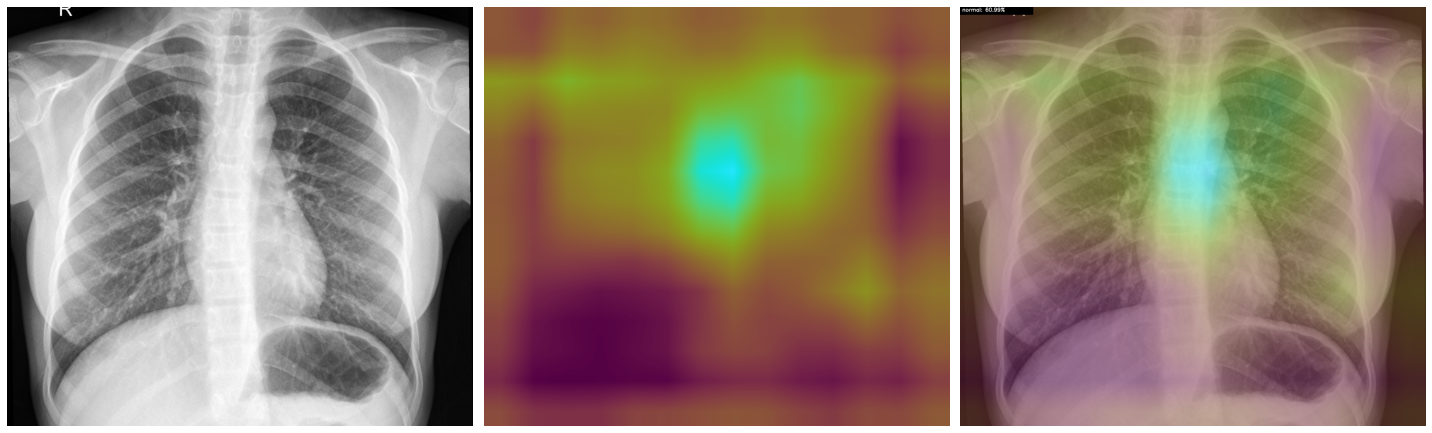

In [25]:

#image_path = "/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/covid/radiopedia-covid-19-pneumonia-2.jpg"
image_path = "/content/gdrive/My Drive/Tubes DSKC 2020 - Covid19/sample_dataset/normal/IM-0033-0001-0001.jpeg"
data = []
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = cv2.resize(image, (224, 224))
data.append(image)
data = np.array(data) / 255.0

orig = cv2.imread(image_path)
resized = cv2.resize(orig, (224, 224))
# use the network to make predictions on the input imag and find
# the class label index with the largest corresponding probability
preds = model.predict(data)
i = np.argmax(preds[0])

label = "covid" if i == 0 else "normal"
prob = preds[0][i] * 100

label = "{}: {:.2f}%".format(label, prob)
print("[INFO] {}".format(label))

# initialize our gradient class activation map and build the heatmap
cam = GradCAM(model, i, "block5_conv3")
heatmap = cam.compute_heatmap(data)

# resize the resulting heatmap to the original input image dimensions
# and then overlay heatmap on top of the image
heatmap = cv2.resize(heatmap, (orig.shape[1], orig.shape[0]))
(heatmap, output) = cam.overlay_heatmap(heatmap, orig, alpha=0.5)

# draw the predicted label on the output image
cv2.rectangle(output, (0, 0), (340, 40), (0, 0, 0), -1)
cv2.putText(output, label, (10, 25), cv2.FONT_HERSHEY_SIMPLEX,
	0.8, (255, 255, 255), 2)


# display the original image and resulting heatmap and output image
arr_output = [orig, heatmap, output]
plotImages(arr_output)